<a href="https://colab.research.google.com/github/Ioln/DataIoannis/blob/DataNBA/DataNBACourt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*DATANBA*

Creating a Shooting Map for NBA Players

Let's import an API from the NBA.

In [1]:
pip install nba_api

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 255 kB 5.0 MB/s 


In [2]:
import requests
from nba_api.stats.endpoints import leaguegamefinder
from nba_api.stats.endpoints import playbyplayv2
from nba_api.stats.endpoints import shotchartdetail
import json
import pandas as pd
import time


"""Get the games so we can choose what one we want to look at"""
try:
    result = leaguegamefinder.LeagueGameFinder(
        season_nullable='2022-23',
        season_type_nullable="Regular Season"
    )
    time.sleep(5)
except requests.exceptions.ReadTimeout:
    print('Timeout error for games')
    time.sleep(5)

"""Send the games to a csv file"""
all_games = result.get_data_frames()[0]
all_games.to_csv('Games.csv', index=False)

"""Take an example Game_ID from the Games CSV"""
game_id = '0022200051'

"""Print the Plays"""
try:
    pbp = playbyplayv2.PlayByPlayV2(game_id)
    pbp = pbp.get_data_frames()[0]
    pbp.to_csv('PBP.csv', mode='w', index=False, header=True)
    time.sleep(5)
except requests.exceptions.ReadTimeout:
    print('Timeout error for plays')
    time.sleep(5)

"""Find the shot details for the chosen game"""
try:
    response = shotchartdetail.ShotChartDetail(
        team_id='1610612757',  # When set to zero it takes all teams
        player_id='1629014',  # When set to zero it takes all players
        game_id_nullable='0022200051',# 10 digit value
        context_measure_simple='FGA',  # All shots, Default is 'PTS' (Shots Made)
        season_type_all_star='Regular Season'
    )
    content = json.loads(response.get_json())
except requests.exceptions.ReadTimeout:
    print('Timeout error for shots')
    time.sleep(5)

"""Transform shot data contents into dataframe"""
results = content['resultSets'][0]
headers = results['headers']
rows = results['rowSet']
df = pd.DataFrame(rows)
df.columns = headers

"""Write Shot location to CSV"""
df.to_csv('ShotData.csv', index=False)

We now have all the games and team stats for the current season

In [5]:
dfp = pd.read_csv('Games.csv')

dfp

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22022,1610612756,PHX,Phoenix Suns,22200055,2022-10-25,PHX vs. GSW,W,238,134,...,0.824,14,34,48,31,8,4,13,19,29.0
1,22022,1610612744,GSW,Golden State Warriors,22200055,2022-10-25,GSW @ PHX,L,240,105,...,0.765,10,30,40,28,7,7,13,27,-29.0
2,22022,1610612760,OKC,Oklahoma City Thunder,22200054,2022-10-25,OKC vs. LAC,W,239,108,...,0.800,21,39,60,19,12,8,5,13,14.0
3,22022,1610612746,LAC,LA Clippers,22200054,2022-10-25,LAC @ OKC,L,241,94,...,0.778,7,40,47,21,5,14,18,18,-14.0
4,22022,1610612740,NOP,New Orleans Pelicans,22200053,2022-10-25,NOP vs. DAL,W,239,113,...,0.722,4,22,26,25,7,3,14,21,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,22022,1610612740,NOP,New Orleans Pelicans,22200006,2022-10-19,NOP @ BKN,W,240,130,...,0.720,21,40,61,31,9,4,12,21,22.0
106,22022,1610612744,GSW,Golden State Warriors,22200002,2022-10-18,GSW vs. LAL,W,241,123,...,0.739,11,37,48,31,11,4,18,23,14.0
107,22022,1610612747,LAL,Los Angeles Lakers,22200002,2022-10-18,LAL @ GSW,L,241,109,...,0.760,9,39,48,23,12,4,21,18,-14.0
108,22022,1610612738,BOS,Boston Celtics,22200001,2022-10-18,BOS vs. PHI,W,240,126,...,0.786,6,30,36,24,8,3,10,23,9.0


The details of player or team shots in a given match

In [4]:
df = pd.read_csv('ShotData.csv')

df

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,22200051,41,1629014,Anfernee Simons,1610612757,Portland Trail Blazers,1,8,40,...,Center(C),24+ ft.,25,1,259,1,0,20221024,POR,DEN
1,Shot Chart Detail,22200051,61,1629014,Anfernee Simons,1610612757,Portland Trail Blazers,1,6,39,...,Right Side Center(RC),24+ ft.,24,126,215,1,1,20221024,POR,DEN
2,Shot Chart Detail,22200051,126,1629014,Anfernee Simons,1610612757,Portland Trail Blazers,1,1,51,...,Center(C),Less Than 8 ft.,7,61,36,1,1,20221024,POR,DEN
3,Shot Chart Detail,22200051,129,1629014,Anfernee Simons,1610612757,Portland Trail Blazers,1,1,21,...,Center(C),Less Than 8 ft.,1,-16,-3,1,1,20221024,POR,DEN
4,Shot Chart Detail,22200051,161,1629014,Anfernee Simons,1610612757,Portland Trail Blazers,2,10,51,...,Right Side Center(RC),24+ ft.,26,212,151,1,0,20221024,POR,DEN
5,Shot Chart Detail,22200051,244,1629014,Anfernee Simons,1610612757,Portland Trail Blazers,2,4,50,...,Right Side(R),24+ ft.,23,228,37,1,0,20221024,POR,DEN
6,Shot Chart Detail,22200051,347,1629014,Anfernee Simons,1610612757,Portland Trail Blazers,3,9,48,...,Center(C),Less Than 8 ft.,1,7,15,1,1,20221024,POR,DEN
7,Shot Chart Detail,22200051,354,1629014,Anfernee Simons,1610612757,Portland Trail Blazers,3,9,3,...,Right Side Center(RC),16-24 ft.,20,135,155,1,1,20221024,POR,DEN
8,Shot Chart Detail,22200051,365,1629014,Anfernee Simons,1610612757,Portland Trail Blazers,3,7,50,...,Left Side Center(LC),24+ ft.,30,-167,255,1,1,20221024,POR,DEN
9,Shot Chart Detail,22200051,369,1629014,Anfernee Simons,1610612757,Portland Trail Blazers,3,7,23,...,Right Side Center(RC),24+ ft.,28,129,256,1,1,20221024,POR,DEN


Using matplotlib library to draw the basketball court.

In [6]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    """ (None) -> None

    Draw a basketball court on an matplotlib figure.
    """
    
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()
        
    # Create the various parts of an NBA basketball court
    
    # The basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system (9in / 12ft = .75; .75*10ft = 7.5ft)
    hoop = plt.Circle((0,0), radius=7.5, linewidth=lw, color=color, fill=False)
    
    # Backboard
    backboard = plt.Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)
    
# The paint
    # The outer box of the paint (width=16ft, height=19ft)
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color, fill=False)

    # The inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color, fill=False)
    
    # Free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)
    
# Three point line
    # The side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    
    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]
    
    
    if outer_lines:
        # Draw the half court line, baseline, and side outbound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw, color=color, fill=False)
        court_elements.append(outer_lines)
        
    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)
    
    return ax

In [7]:
import urllib
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle, Arc

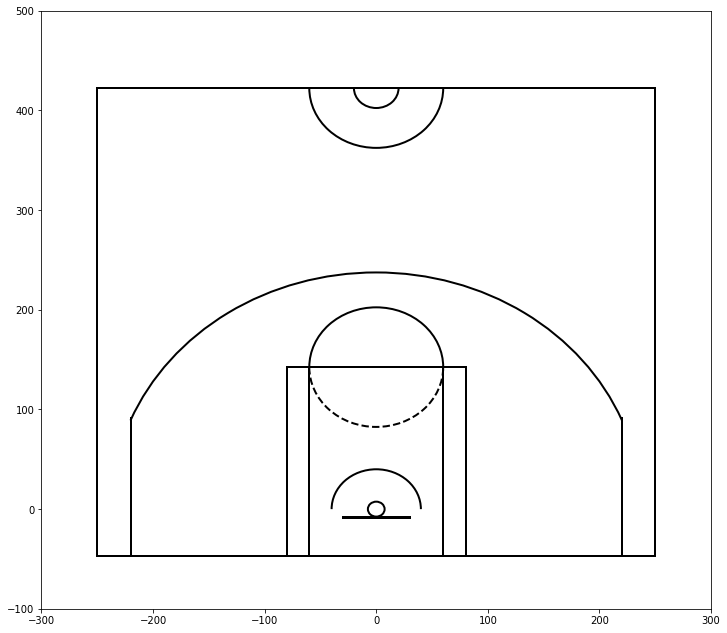

In [8]:
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

In [9]:
import numpy as np
from scipy.stats import binned_statistic_2d
import seaborn as sns
from bokeh.plotting import figure
from math import pi
%matplotlib inline

Location of shots using scatterplot

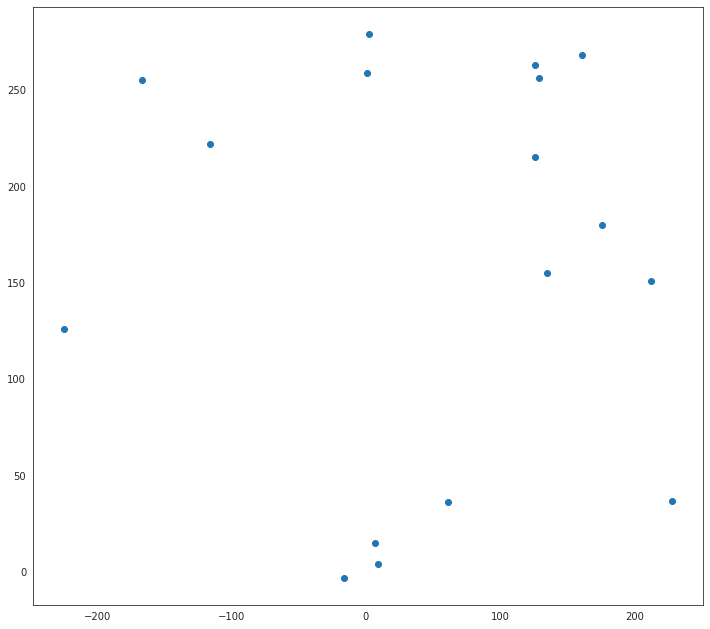

In [10]:
sns.set_style("white")
sns.set_color_codes()
plt.figure(figsize=(12,11))
plt.scatter(df.LOC_X, df.LOC_Y)
plt.show()

In [11]:
def shot_chart(data, title="", color="orange",
               xlim=(-250, 250), ylim=(422.5, -47.5), line_color="black",
               court_color="orange", court_lw=2, outer_lines=False,
               flip_court=False, gridsize=None, 
               ax=None, despine=False, **kwargs):

    if ax is None:
        ax = plt.gca()

    if not flip_court:
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
    else:
        ax.set_xlim(xlim[::-1])
        ax.set_ylim(ylim[::-1])

    ax.tick_params(labelbottom="off", labelleft="off")
    ax.set_title(title, fontsize=18)

    # draws the court
    draw_court(ax, color=line_color, lw=court_lw, outer_lines=outer_lines)

    # separate color by make or miss    
    x_missed = data[data['EVENT_TYPE'] == 'Missed Shot']['LOC_X']
    y_missed = data[data['EVENT_TYPE'] == 'Missed Shot']['LOC_Y']

    x_made = data[data['EVENT_TYPE'] == 'Made Shot']['LOC_X']
    y_made = data[data['EVENT_TYPE'] == 'Made Shot']['LOC_Y']

    # plot missed shots
    ax.scatter(x_missed, y_missed, c='r', marker="x", s=300, linewidths=3, **kwargs)
    # plot made shots
    ax.scatter(x_made, y_made, facecolors='none', edgecolors='g', marker="o", s=100, linewidths=3, **kwargs)
        
    # Set the spines to match the rest of court lines, makes outer_lines
    # somewhate unnecessary
    for spine in ax.spines:
        ax.spines[spine].set_lw(court_lw)
        ax.spines[spine].set_color(line_color)

    if despine:
        ax.spines["top"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)

    return ax

Our player was chosen by Anfernee Simons of the Portland Trail Blazers, with his great performance against the Denver Nuggets.

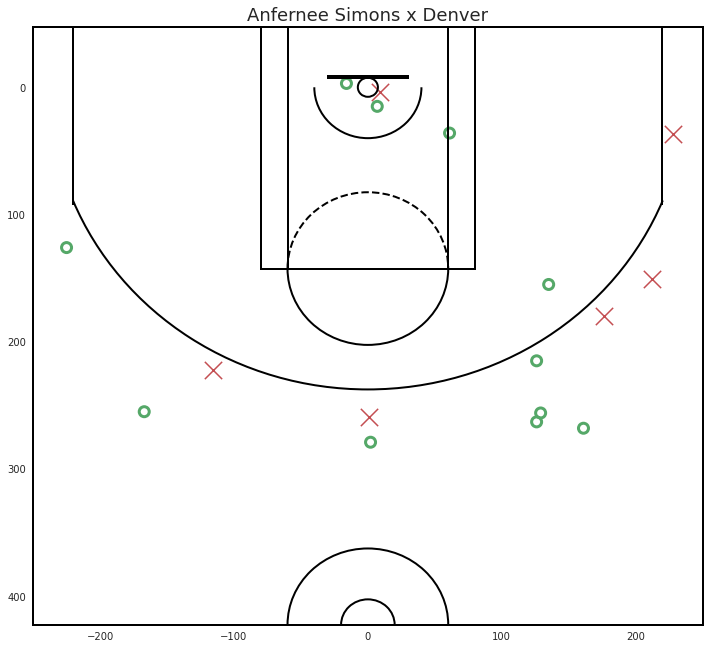

FG%:  0.647 (11-17)


In [12]:
plt.rcParams['figure.figsize'] = (12, 11)
shot_chart(df, title="Anfernee Simons x Denver")
plt.show()
print("FG%: ", "{0:.3f}".format(df['SHOT_MADE_FLAG'].sum()/len(df)), "({0}-{1})".format(df['SHOT_MADE_FLAG'].sum(),len(df)))